<a href="https://colab.research.google.com/github/Rashmisharma0101/Plots---Line-Bar-Pieplots/blob/master/Deeplearning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# REGRESSION WITH TENSORFLOW
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [9]:
import io
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))

In [12]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


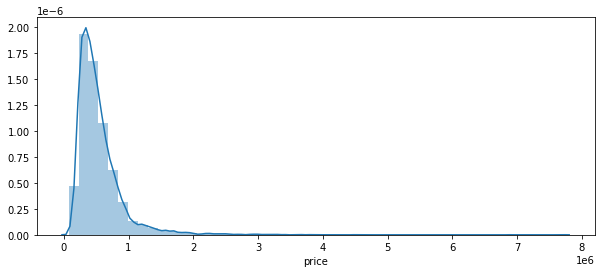

In [15]:
plt.figure(figsize = (10,4))
sns.distplot(df['price'])

In [16]:
df.drop('id', axis =1, inplace = True)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date : date.year)
df['month'] = df['date'].apply(lambda date : date.month)
df.drop('date', axis = 1, inplace =True)

In [62]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis = 1).values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 101, test_size=0.30)

#.values is needed as tensorflow have problem in understanding pandas series and dataframes

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
X_train.shape

(15129, 20)

In [58]:
y_train.shape

(6484, 20)

In [52]:
X_test.shape

(15129,)

In [61]:
y_train

array([[2.000e+00, 1.000e+00, 1.050e+03, ..., 9.616e+03, 2.015e+03,
        1.000e+00],
       [4.000e+00, 2.250e+00, 2.040e+03, ..., 8.580e+03, 2.015e+03,
        4.000e+00],
       [4.000e+00, 2.500e+00, 2.500e+03, ..., 4.300e+03, 2.015e+03,
        2.000e+00],
       ...,
       [3.000e+00, 2.000e+00, 2.620e+03, ..., 7.812e+03, 2.014e+03,
        1.100e+01],
       [2.000e+00, 1.000e+00, 9.000e+02, ..., 4.500e+03, 2.015e+03,
        4.000e+00],
       [4.000e+00, 3.500e+00, 3.500e+03, ..., 9.525e+03, 2.014e+03,
        9.000e+00]])

In [63]:
# X_train= X_train.reshape(15129, 20)
# y_train= y_train.reshape(6484, 20)
# X_test = X_test.reshape(15129,)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
from tensorflow.keras.models import Sequential

In [45]:
from tensorflow.keras.layers import Dense

In [64]:
model = Sequential() 
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')

In [65]:
model.fit(x=X_train, y = y_train, 
          validation_data = (X_test, y_test), batch_size = 128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 0s 4ms/step - loss: 423630012416.0000 - val_loss: 433030496256.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 422745866240.0000 - val_loss: 429795868672.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 409445400576.0000 - val_loss: 398462582784.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 342857580544.0000 - val_loss: 287065014272.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 201639952384.0000 - val_loss: 140226740224.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 109975527424.0000 - val_loss: 106672128000.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 100170276864.0000 - val_loss: 104776941568.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 98803556352.0000 - val_loss: 103294836736.0000
Epoch 9/400
119/1

In [41]:
#since it is a very large set, 
# smaller batches in the power of 2 is generaaly preferred, smaller the batch, more chances are that we dont over fit the model as we are passing small batches
#chose 400 epochs, rightnow we dont know early stoping mechanism

In [70]:
losses = pd.DataFrame(model.history.history)

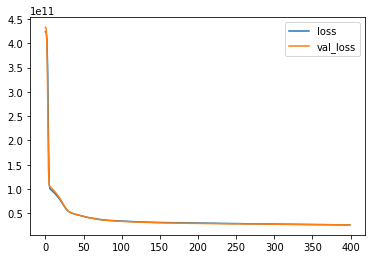

In [74]:
losses.plot()

In [ ]:
#if there was overfitting, val_loss would spike, unlike in this case, calidation loss is decreasing not spiking, as validation data is decreasing, we could have trained a litlle more
#this graph is quite perfect, both are going down, no overfitting 

In [72]:
%matplotlib inline

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [76]:
predictions = model.predict(X_test)

In [77]:
mean_squared_error(y_test, predictions)

26080719472.873867

In [78]:
np.sqrt(mean_squared_error(y_test, predictions))

161495.2614564089

In [79]:
mean_absolute_error(y_test,predictions)

100383.24967708976

In [80]:
df['price'].describe().transpose()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [81]:
5.400881e+05

540088.1

In [82]:
explained_variance_score(y_test, predictions)

0.8140832243092824

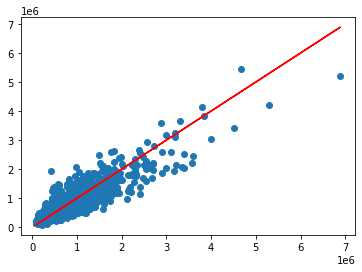

In [85]:
#variance scoreis okay, not great
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [ ]:
#outliers are not good at predicting the model
# we are good at predicting values till almost 2m dollars, also we saw , we could have trained model little bit more

In [ ]:
# now we want to predict a avalue of a new house
#lets take our first house as an example

In [91]:
single_house = df.drop('price', axis = 1).iloc[0]

KeyError: ignored

In [95]:
single_house

bedrooms             3.0000
bathrooms            1.0000
sqft_living       1180.0000
sqft_lot          5650.0000
floors               1.0000
waterfront           0.0000
view                 0.0000
condition            3.0000
grade                7.0000
sqft_above        1180.0000
sqft_basement        0.0000
yr_built          1955.0000
yr_renovated         0.0000
zipcode          98178.0000
lat                 47.5112
long              -122.2570
sqft_living15     1340.0000
sqft_lot15        5650.0000
year              2014.0000
month               10.0000
Name: 0, dtype: float64

In [98]:
single_house = scaler.transform(single_house.values.reshape(-1,20))

In [99]:
model.predict(single_house)

array([[275061.53]], dtype=float32)

In [102]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [ ]:
# we need to train the model more, as predicted price are around 6000 dollars more

In [ ]:
#but it is okay , not too off

ValueError: ignored